<a href="https://colab.research.google.com/github/NguyenHan243/ANN/blob/main/written_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import keras
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np


In [57]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [58]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [59]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(256,activation='relu'))
model.add(Dense(112,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [60]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])


In [61]:
history=model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test))
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f'Test Accuracy:{test_acc}')

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8794 - loss: 0.3763 - val_accuracy: 0.9635 - val_loss: 0.1225
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9729 - loss: 0.0887 - val_accuracy: 0.9722 - val_loss: 0.0930
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9824 - loss: 0.0585 - val_accuracy: 0.9775 - val_loss: 0.0750
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9870 - loss: 0.0415 - val_accuracy: 0.9803 - val_loss: 0.0765
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9898 - loss: 0.0327 - val_accuracy: 0.9786 - val_loss: 0.0879
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9924 - loss: 0.0256 - val_accuracy: 0.9814 - val_loss: 0.0833
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9937 - loss: 0.0203 - val_accuracy: 0.9818 - val_loss: 0.0904
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9951 - loss: 0.0160 - 

In [63]:
model.save('written_digits.h5')
from keras.models import load_model
model=load_model('written_digits.h5')

In [64]:
import cv2
import matplotlib.pyplot as plt
def preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = cv2.bitwise_not(img)
    img = img.astype("float32") / 255
    img = img.flatten()
    return img
def predict_digit(image_path):
    processed_img = preprocess_image(image_path)
    processed_img = processed_img.reshape(1, 784)
    prediction = model.predict(processed_img)
    predicted_digit = np.argmax(prediction)
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis("off")
    plt.show()
    return predicted_digit

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


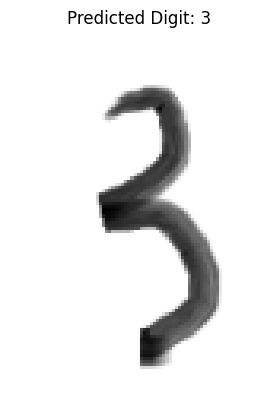

Predicted Digit: 3


In [65]:
image_path = "/content/3.png"
predicted_digit = predict_digit(image_path)
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


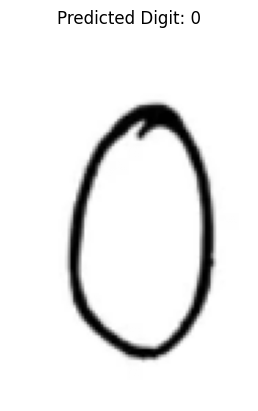

Predicted Digit: 0


In [80]:
image_path = "/content/0.png"
predicted_digit = predict_digit(image_path)
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


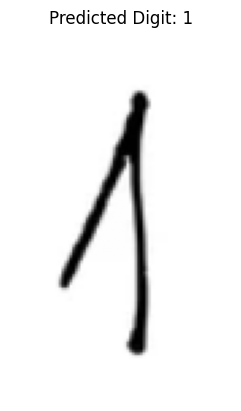

Predicted Digit: 1


In [72]:
image_path = "/content/1.png"
predicted_digit = predict_digit(image_path)
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


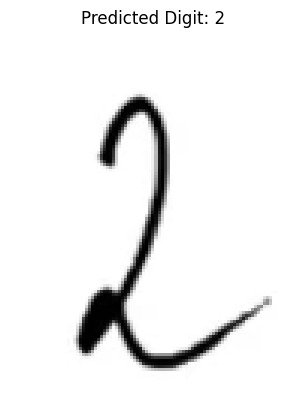

Predicted Digit: 2


In [73]:
image_path = "/content/2.png"
predicted_digit = predict_digit(image_path)
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


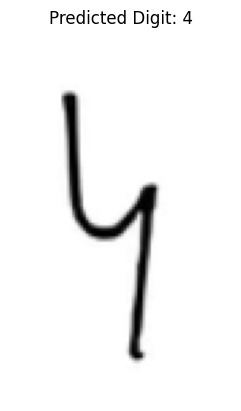

Predicted Digit: 4


In [74]:
image_path = "/content/4.png"
predicted_digit = predict_digit(image_path)
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


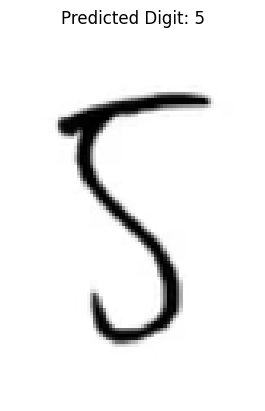

Predicted Digit: 5


In [75]:
image_path = "/content/5.png"
predicted_digit = predict_digit(image_path)
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


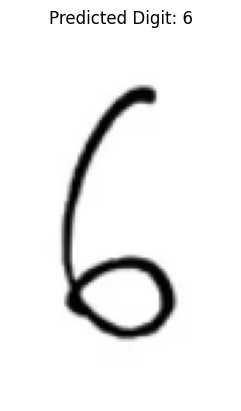

Predicted Digit: 6


In [81]:
image_path = "/content/6.png"
predicted_digit = predict_digit(image_path)
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


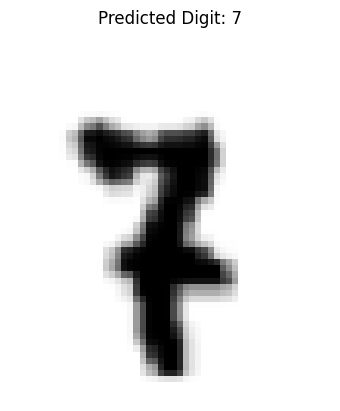

Predicted Digit: 7


In [86]:
image_path = "/content/7.png"
predicted_digit = predict_digit(image_path)
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


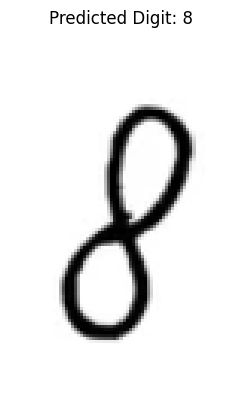

Predicted Digit: 8


In [77]:
image_path = "/content/8.png"
predicted_digit = predict_digit(image_path)
print(f"Predicted Digit: {predicted_digit}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


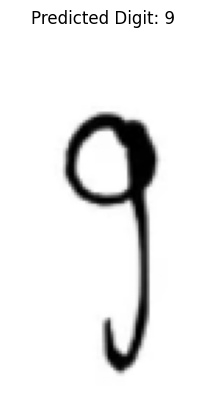

Predicted Digit: 9


In [85]:
image_path = "/content/9.png"
predicted_digit = predict_digit(image_path)
print(f"Predicted Digit: {predicted_digit}")